# 0.0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt

## 0.1. Carregando Dados

In [2]:
filmes = pd.read_csv( 'dados/movies.csv' )
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes = filmes.set_index('filme_id')
filmes.head()

,titulo,generos
filme_id,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
notas = pd.read_csv( 'dados/ratings.csv' )
notas.columns = ['usuario_id', 'filme_id', 'nota', 'momento']
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.describe()

,usuario_id,filme_id,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# 1.0. Primeira abordagem de recomendação: Heurística de total de votos

In [5]:
total_votos = notas['filme_id'].value_counts()
filmes['total_votos'] = total_votos

## 1.1. Ordenando pelo total de votos

In [6]:
filmes.sort_values('total_votos', ascending=False).head()

,titulo,generos,total_votos
filme_id,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [7]:
notas_medias = notas.groupby( 'filme_id' ).mean()['nota']
filmes['nota_media'] = notas_medias
filmes.sort_values('total_votos', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filme_id,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


Se ordenar pelo total de votos podemos observar que a nota média não condiz com as mais bem avaliadas primeiro. 

Então vamos tentar ordenar pela nota média.

# 2.0. Ordenando pela nota média

In [8]:
filmes.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filme_id,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


Pela nota média também não é uma abordagem boa, pois pode ter filmes com apenas uma avaliação e nota máxima, não condizendo com uma recomendação assertiva

## 2.1. Filtrando para votos com uma quantidade de avaliações

In [9]:
filmes.query('total_votos >= 10').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filme_id,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [10]:
filmes.query('total_votos >= 50').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filme_id,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [11]:
filmes_mais_50_votos = filmes.query('total_votos >= 50')
filmes_mais_50_votos.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filme_id,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


Filtrando filmes com quantidade de avaliações maior que 50 temos filmes com uma certa quantidade de avaliações para não tendenciar pelo valor.

## 2.1. Baseado em similaridade de gênero

In [12]:
assistido = [1, 21, 19, 10, 11, 7 , 2]
filmes.iloc[ assistido ]

,titulo,generos,total_votos,nota_media
filme_id,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,36.0,3.222222
20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,15.0,2.500000
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
12,Dracula: Dead and Loving It (1995),Comedy|Horror,19.0,2.421053
8,Tom and Huck (1995),Adventure|Children,8.0,2.875000
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615


In [13]:
aventura_infantil_fantasia = filmes_mais_50_votos.query( 'generos=="Adventure|Children|Fantasy"')
aventura_infantil_fantasia.drop(assistido, errors='ignore').sort_values('nota_media', ascending=False).head(10)


,titulo,generos,total_votos,nota_media
filme_id,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# 3.0. Collaborative filtering x Content based filtering

## 3.1. Similaridade de usuários

### Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

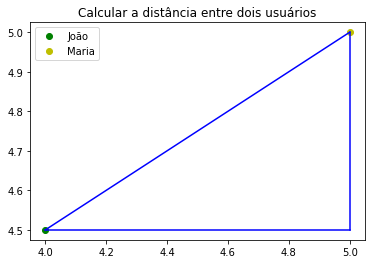

In [14]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [15]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [16]:
def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [17]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular a distância entre usuários')

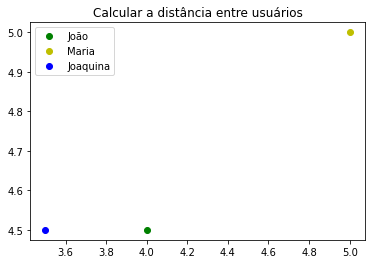

In [18]:
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")

In [19]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


### Implementando códigos para encontrar as distâncias

In [20]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

In [21]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query(f'usuario_id=={usuario}')
  notas_do_usuario = notas_do_usuario[['filme_id', 'nota']].set_index('filme_id')
  return notas_do_usuario

In [22]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

In [23]:
usuario1.head()

,nota
filme_id,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [24]:
usuario4.head()

,nota
filme_id,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [25]:
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

11.135528725660043

In [26]:
def distancia_usuarios(usuario_id1, usuario_id2):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    distancia = distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [27]:
distancia_usuarios(1,4)

[1, 4, 11.135528725660043]

In [28]:
quantidade_usuarios = len(notas['usuario_id'].unique())
print(f'Quantidade de Usuários {quantidade_usuarios} ')

Quantidade de Usuários 610 


In [36]:
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [30]:
# def distancia_todos(voce_id):
#     distancias = []
#     for usuario_id in notas['usuario_id'].unique():
#         informacoes = distancia_usuarios(voce_id, usuario_id)
#         distancias.append(informacoes)
#     return distancias

# distancia_de_todos(1)[:5]

In [33]:
def distancia_todos(voce_id):
    todos_os_usuarios = notas['usuario_id'].unique()
    distancias = [distancia_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [34]:
usuario_1 = distancia_todos(1)


In [35]:
usuario_1.sort_values('distancia', ascending=False).head()

,voce,outra_pessoa,distancia
67,1,68,21.558061
598,1,599,19.665960
216,1,217,19.646883
159,1,160,18.794946
473,1,474,18.594354


### Usuários sem filmes em comum são colocados bem distante um do outro

In [38]:
def distancia_de_usuarios( usuario_id1, usuario_id2, minimo = 5 ):
    notas1 = notas_do_usuario( usuario_id1 )
    notas2 = notas_do_usuario( usuario_id2 )
    diferencas = notas1.join( notas2, lsuffix="_esquerda", rsuffix="_direita" ).dropna()

    if( len( diferencas ) < minimo ):
        return [usuario_id1, usuario_id2, 100000]
  
    distancia =  distancia_de_vetores( diferencas['nota_esquerda'], diferencas['nota_direita'] )
    return [usuario_id1, usuario_id2, distancia]

In [40]:
todos_para_1 = distancia_todos(1)
todos_para_1.head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [43]:
def mais_proximos_de( voce_id ):
    distancias = distancia_todos( voce_id )
    distancias = distancias.sort_values( "distancia" )
    distancias = distancias.set_index( "outra_pessoa" ).drop(voce_id)
    return distancias

In [44]:
mais_proximos_1 = mais_proximos_de(1)
mais_proximos_1.head()

,voce,distancia
outra_pessoa,,
578,1,0.0
77,1,0.0
85,1,0.0
175,1,0.0
556,1,0.0


### Definindo quantidade de usuários para melhor performance

In [45]:
def mais_proximos_de(voce_id, n = None):
    distancias = distancia_todos(voce_id, n = n)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [50]:
def distancia_todos(voce_id, n = None):
    todos_os_usuarios = notas['usuario_id'].unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [52]:
mais_proximos_de(1, n = 50).head()

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776


In [54]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
    notas1 = notas_do_usuario(usuario_id1)
    notas2 = notas_do_usuario(usuario_id2)
    diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()

    if(len(diferencas) < minimo):
        return None

    distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
    return [usuario_id1, usuario_id2, distancia]

In [60]:
def distancia_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_os_usuarios = notas['usuario_id'].unique()
    
    if numero_de_usuarios_a_analisar:
        todos_os_usuarios = todos_os_usuarios[:numero_de_usuarios_a_analisar]
    
    distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [61]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
    distancias = distancia_todos(voce_id, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values("distancia")
    distancias = distancias.set_index("outra_pessoa").drop(voce_id)
    return distancias

In [62]:
mais_proximos_de(1, numero_de_usuarios_a_analisar = 50).head()

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776


In [63]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximos_de(voce, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore')
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [64]:
sugere_para(1, numero_de_usuarios_a_analisar=50).head()

,nota,titulo,generos,total_votos,nota_media
filme_id,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [65]:
sugere_para(1).head()

,nota,titulo,generos,total_votos,nota_media
filme_id,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
